<a href="https://colab.research.google.com/github/hal-yu/datasci_6_regression/blob/main/datasci_6_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading Packages

In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from statsmodels.stats.diagnostic import linear_rainbow
from scipy.stats import shapiro
from statsmodels.stats.diagnostic import het_goldfeldquandt
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Loading Data

In [49]:
df = pd.read_csv('heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


## Simple Linear Regression

In [50]:
# Variables:
# IV = Age
# DV = RestingBP

# Fit the regression model
X = sm.add_constant(df['Age']) # Adds a constant term to the predictor
model = sm.OLS(df['RestingBP'], X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              RestingBP   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     63.38
Date:                Fri, 10 Nov 2023   Prob (F-statistic):           5.01e-15
Time:                        23:37:03   Log-Likelihood:                -3950.6
No. Observations:                 918   AIC:                             7905.
Df Residuals:                     916   BIC:                             7915.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        105.6769      3.408     31.010      0.0

The R^2 value for the regression model is 0.065, which is close to 0. This means that the independent variable (age) is not effective for predicting the resting blood pressure.

In [51]:
residuals = results.resid
fitted = results.fittedvalues

### Checking Assumptions

In [52]:
# Assessing linearity of the relationship
stat, p_value = linear_rainbow(results)
print(f"Rainbow Test: stat={stat}, p-value={p_value}")

Rainbow Test: stat=0.8234238447620816, p-value=0.9810704659721197


The p-value of p-value=3.1197777074731364e-06 is a very small number, which suggests that there is a signficiant difference.

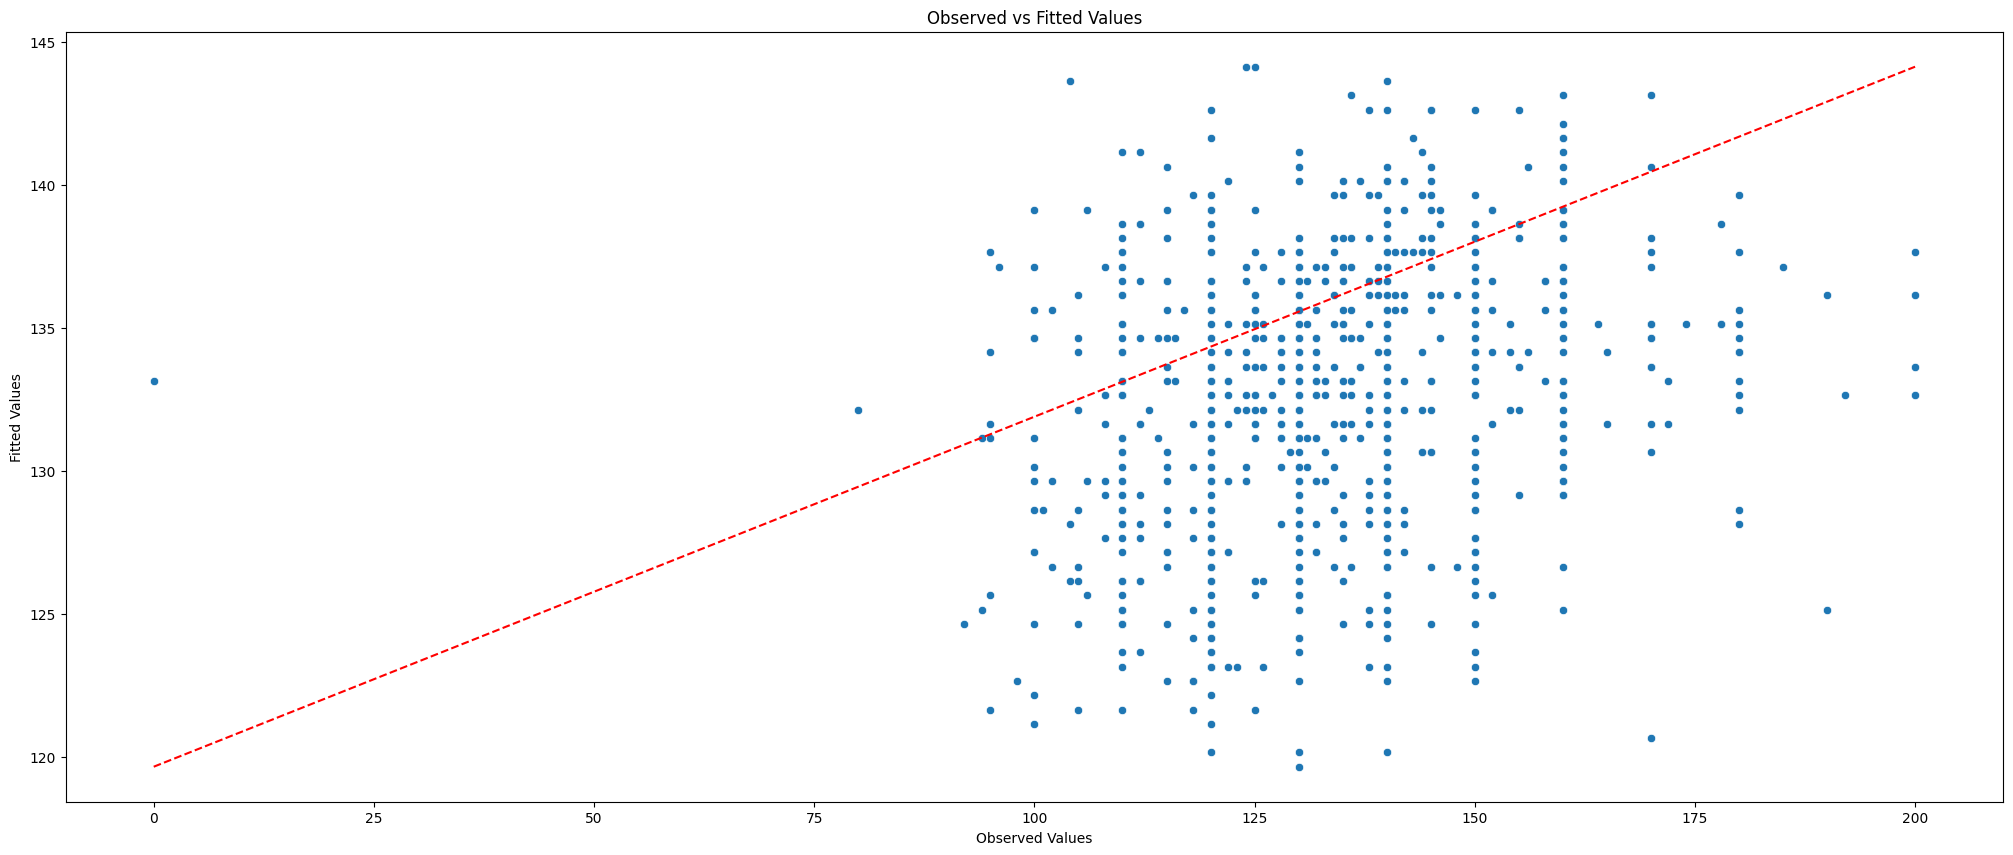

In [54]:
# A significant p-value indicates that the relationship is not linear.
# Plot observed vs fitted values
plt.figure(figsize=(25, 10))
sns.scatterplot(x=df['RestingBP'], y=fitted)
plt.xlabel('Observed Values')
plt.ylabel('Fitted Values')
plt.title('Observed vs Fitted Values')
plt.plot([min(df['RestingBP']), max(df['RestingBP'])], [min(fitted), max(fitted)], color='red', linestyle='--')
plt.show()

In [55]:
# Assessing normality of the residuals
W, p_value = shapiro(residuals)
print(f"Shapiro-Wilk Test: W={W}, p-value={p_value}")

Shapiro-Wilk Test: W=0.9623121023178101, p-value=1.2059207223026527e-14


The Shapiro-Wilk Test has a p-value of 1.2059207223026527e-14, which is less than 0.05. This indicatess that the residuals does not have a normal distribution.

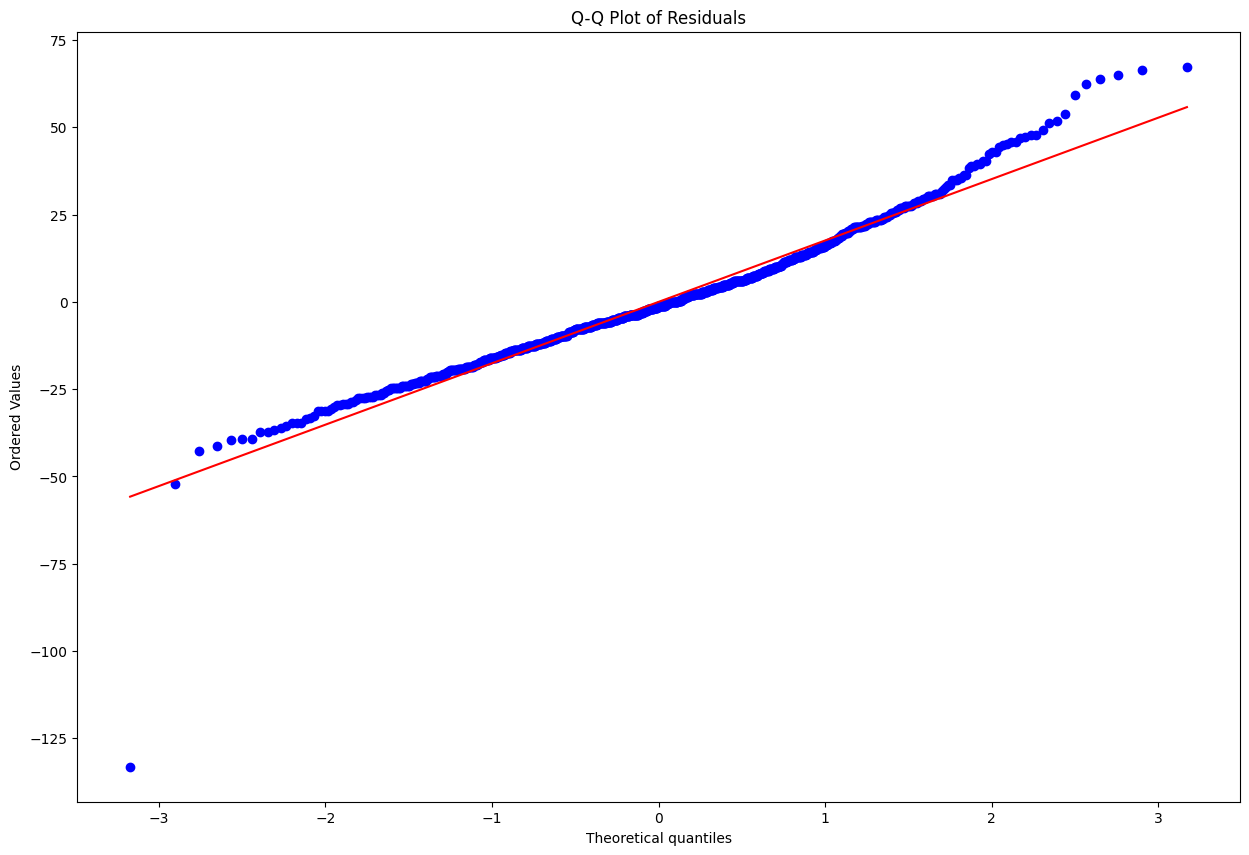

In [57]:
# Plot Q-Q plot of residuals
plt.figure(figsize=(15, 10))
stats.probplot(residuals, plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

The quantile-quantile plots assess how teh residuals follow the normal distribution. Since it deviates from the straight line, it suggests that the residuals do not follow a normal distribution.

In [77]:
# Assessing the homogeneity of variance of the residuals
gq_test = het_goldfeldquandt(residuals, results.model.exog)
print(f"Goldfeld-Quandt Test: F-statistic={gq_test[0]}, p-value={gq_test[1]}")
# Goldfeld-Quandt Test: The Goldfeld-Quandt test is another test used to assess homoscedasticity.
# It divides the data into two groups and compares the variance of the residuals in the two groups.
# a significant p-value indicates heteroscedasticity, meaning that the variance of the residuals is not constant across different levels of the independent variable(s).

Goldfeld-Quandt Test: F-statistic=0.7146235188635923, p-value=0.9998289082300708


The Goldfeld-Quandt Test has a p-value=0.9998289082300708, which indicates that there is no evidence of heteroscedasticity.

Goldfeld-Quandt Test: F-statistic=0.7146235188635923, p-value=0.9998289082300708


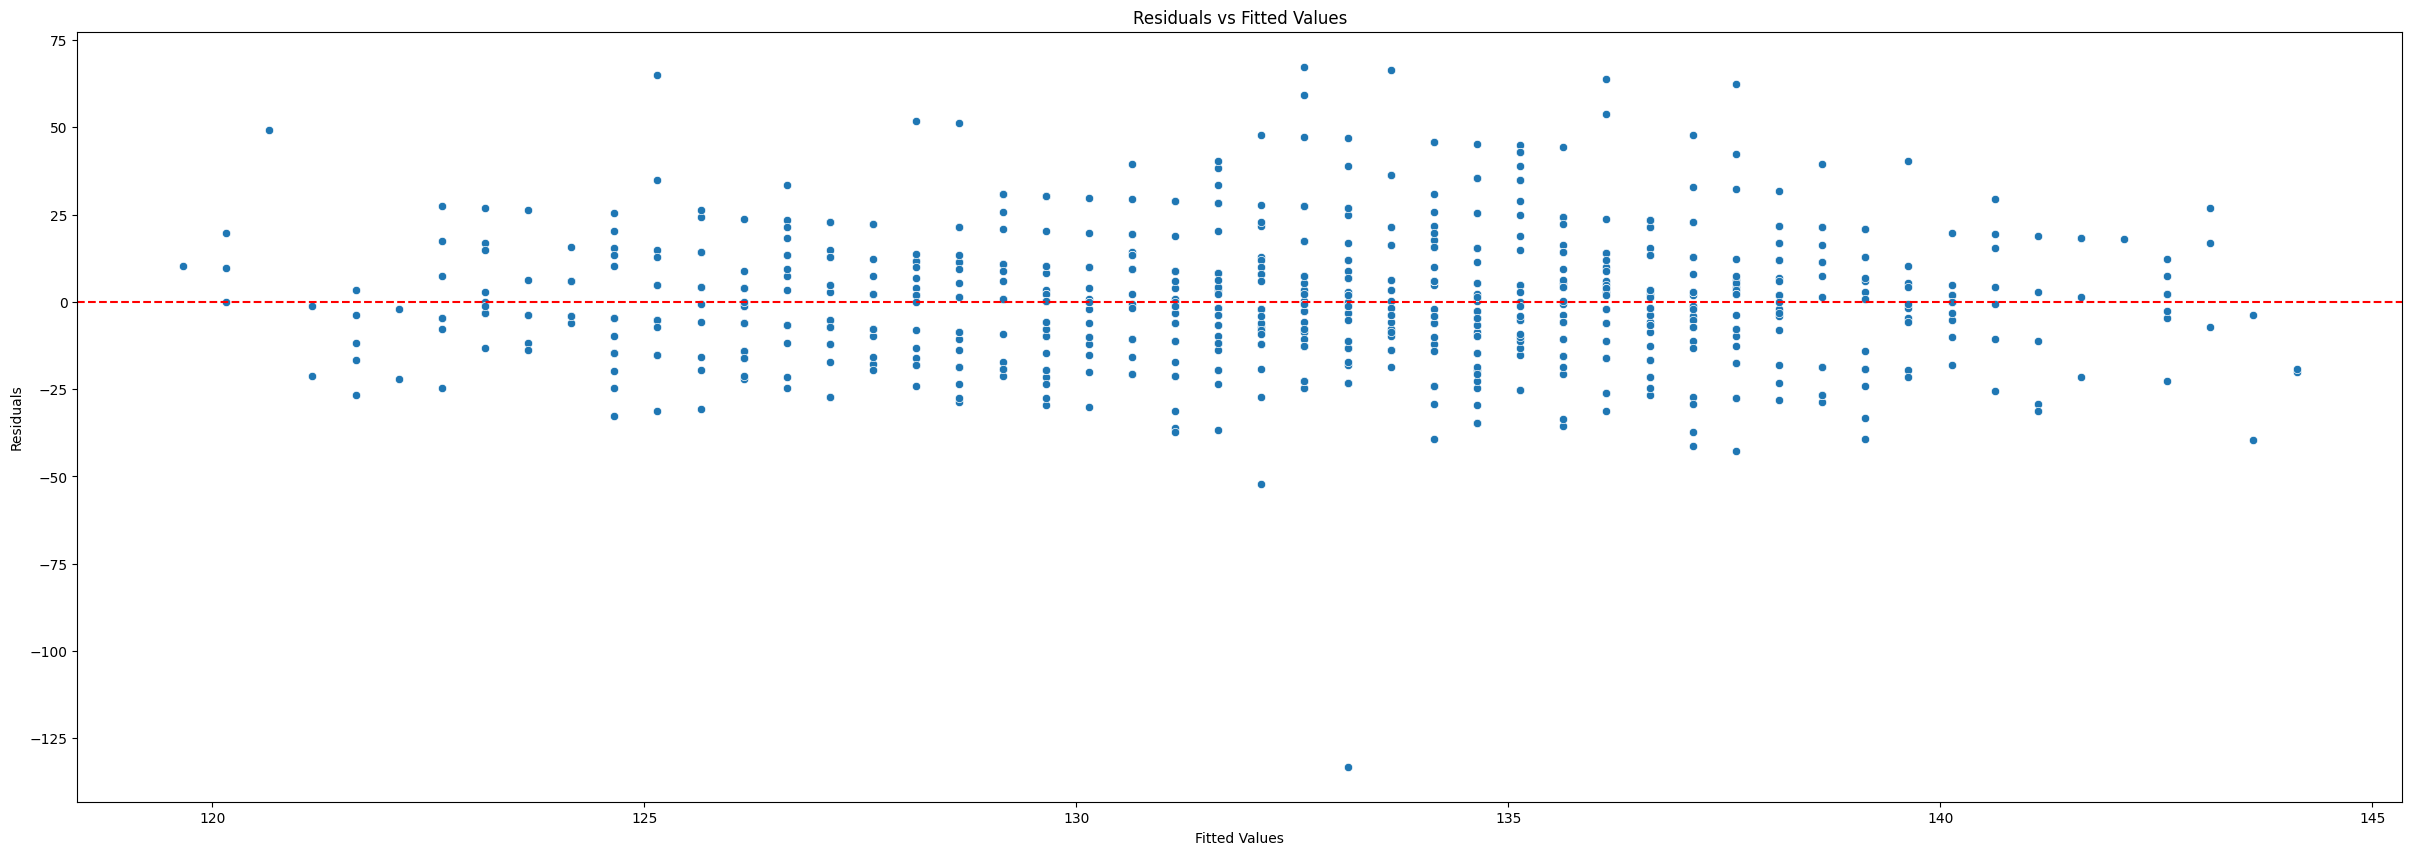

In [58]:
# Plot residuals vs fitted values
plt.figure(figsize=(30, 10))
sns.scatterplot(x=fitted, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

## Multiple Linear Regressions

In [59]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [60]:
# Variables
# IV: Age, RestingBP, Cholesterol
# DV: MaxHR

# Fit the regression model
X = df[['Age', 'RestingBP', 'Cholesterol']]
X = sm.add_constant(X)  # Adds a constant term to the predictor
y = df['MaxHR']
model = sm.OLS(y, X)
results1 = model.fit()

print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                  MaxHR   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     70.46
Date:                Fri, 10 Nov 2023   Prob (F-statistic):           5.38e-41
Time:                        23:39:22   Log-Likelihood:                -4178.3
No. Observations:                 918   AIC:                             8365.
Df Residuals:                     914   BIC:                             8384.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         185.9207      6.378     29.150      

The R^2 value for the multiple regression model is 0.188. This suggests that only 18.8% of the variance is a result of the two independent variables.

In [61]:
residuals1 = results.resid
fitted1 = results.fittedvalues

### Checking Assumptions

In [62]:
# Checking multicollinearity using VIF
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVIF Data:")
print(vif_data)


VIF Data:
      Variable        VIF
0        const  70.702198
1          Age   1.086364
2    RestingBP   1.087572
3  Cholesterol   1.026505


- VIF is a measure of how much variance of an estimated regression coefficiant increases if the independent variabbles have a correlation. A high VIF means that they are highly likely to be correlated. If the VIF is greater than 1, it suggets that there is some degree of correlation.
- The VIF for age, resting blood pressure, and cholesterol are all close to 1, which indicates low correlation with other variables.

In [68]:
# Assessing linearity of the relationship
stat, p_value = linear_rainbow(results1)
print(f"Rainbow Test: stat={stat}, p-value={p_value}")

Rainbow Test: stat=1.1232083929575725, p-value=0.10736944198408786


The Rainbow test can check whether the relationship between trhe DV and IV's are accurately captured. With a p-value of 0.10736944198408786, the Rainbow test suggets that there is no strong evidence of nonlinearity between the DV and the IV's and that it is not statistically significant.

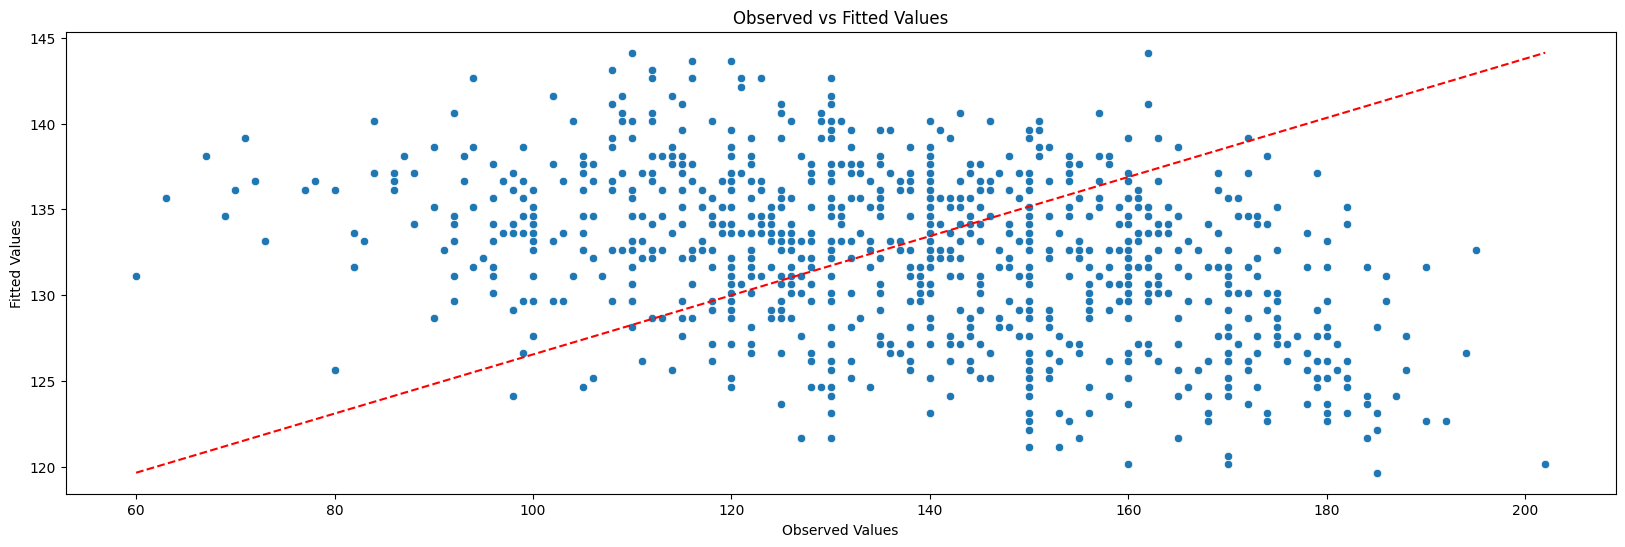

In [69]:
# A significant p-value indicates that the relationship is not linear.
# Plot observed vs fitted values
plt.figure(figsize=(20, 6))
sns.scatterplot(x=df['MaxHR'], y=fitted1)
plt.xlabel('Observed Values')
plt.ylabel('Fitted Values')
plt.title('Observed vs Fitted Values')
plt.plot([min(df['MaxHR']), max(df['MaxHR'])], [min(fitted1), max(fitted1)], color='red', linestyle='--')
plt.show()

In [70]:
# Assessing normality of the residuals
W, p_value = shapiro(residuals1)
print(f"Shapiro-Wilk Test: W={W}, p-value={p_value}")

Shapiro-Wilk Test: W=0.9623121023178101, p-value=1.2059207223026527e-14


The Shapiro_wilk test has a p-value of 1.2059207223026527e-14. Since the p-value is small, it suggests that there is evidence the data does not follow a normal distribution.

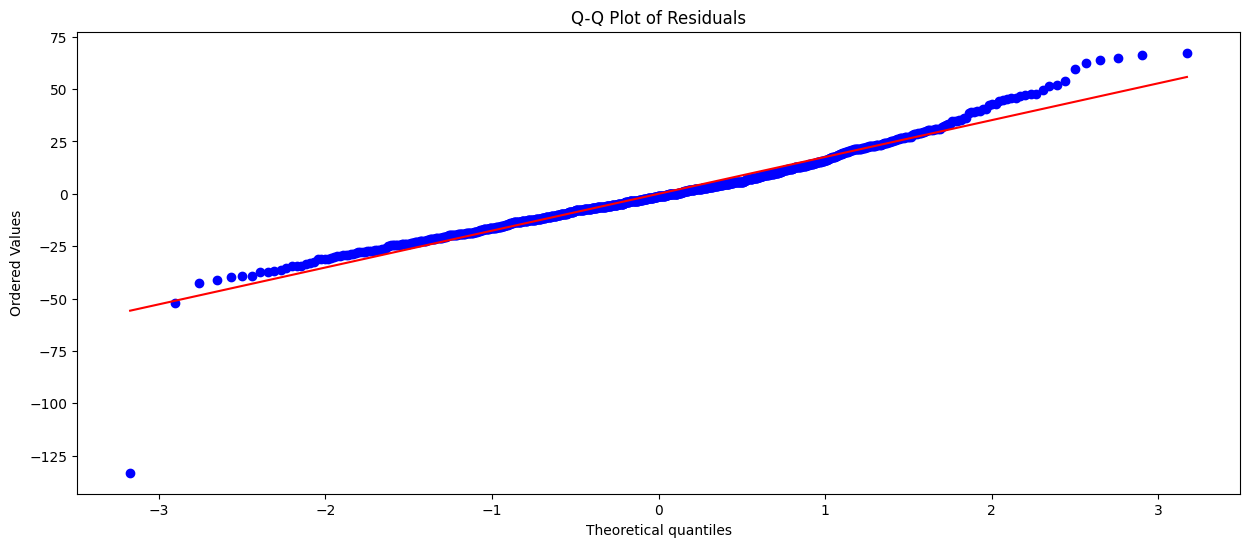

In [72]:
# Plot Q-Q plot of residuals
plt.figure(figsize=(15, 6))
stats.probplot(residuals1, plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

IN this quantile-quantile plot, the points deviate from the straight line, which indicates that the residuals do not follow a normal distribution.

In [73]:
# Assessing the homogeneity of variance of the residuals
gq_test = het_goldfeldquandt(residuals1, results.model.exog)
print(f"Goldfeld-Quandt Test: F-statistic={gq_test[0]}, p-value={gq_test[1]}")
# a significant p-value indicates heteroscedasticity, meaning that the variance of the

Goldfeld-Quandt Test: F-statistic=0.7146235188635923, p-value=0.9998289082300708


The Goldfeld-Quandt Test has a p-value of 9998289082300708. Since my p-value is close to 1, it indicates that there is no evidence of heteroscedasticity.

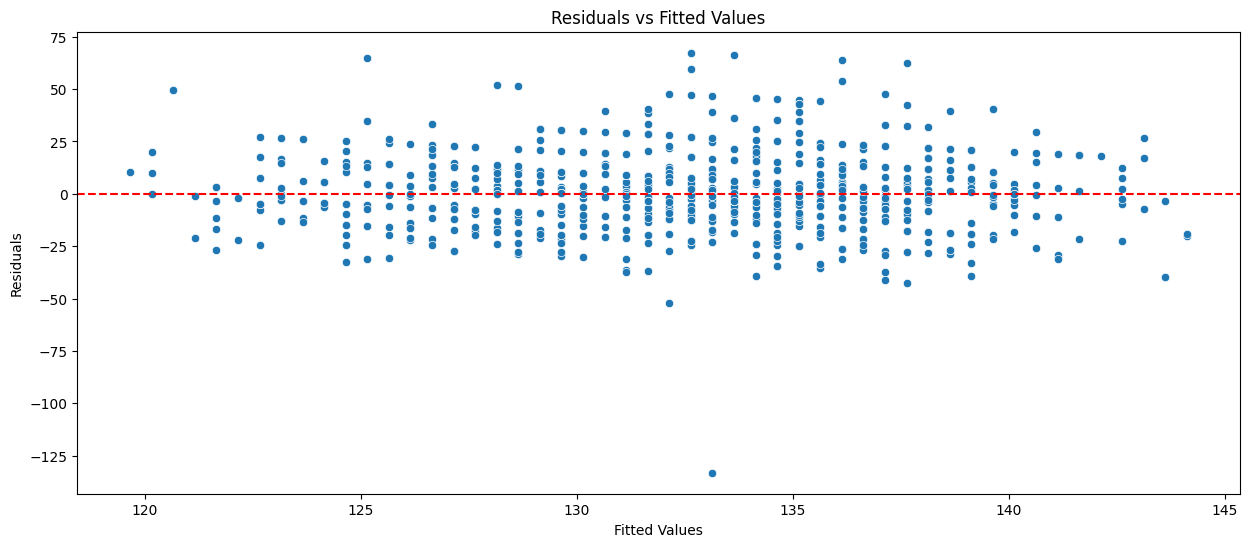

In [75]:
# residuals is not constant across different levels of the independent variable(s).

# Plot residuals vs fitted values
plt.figure(figsize=(15, 6))
sns.scatterplot(x=fitted1, y=residuals1)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()